## Pro Football Reference Python API

To use: pip install nfl_data_py

Documentation: [pypi.org](https://pypi.org/project/nfl-data-py/)

Where it pulls data from: [sports-reference](https://www.sports-reference.com/)

In [153]:
import nfl_data_py as nfl

### Capabilities

Has access to almost every set of data from any of the past NFL seasons and games and is very easy to refine and generate the neccessary data. 

### Basic Stats 

For example, in my project I wanted all the basic offensive stats for the past year, which we can easily find. First we import the weekly data into a DataFrame

In [168]:
import pandas as pd

df_2022 = nfl.import_weekly_data([2022], columns=['week', 'player_id', 'passing_yards', 'passing_tds', 'interceptions', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles_lost', 'rushing_2pt_conversions', 'receptions', 'receiving_yards', 'receiving_tds', 
       'receiving_fumbles_lost', 'receiving_2pt_conversions', 'special_teams_tds', 'fantasy_points_ppr'])
df_2022

Downcasting floats.


,week,player_id,passing_yards,passing_tds,interceptions,rushing_yards,rushing_tds,rushing_fumbles_lost,rushing_2pt_conversions,receptions,receiving_yards,receiving_tds,receiving_fumbles_lost,receiving_2pt_conversions,special_teams_tds,fantasy_points_ppr
0,1,00-0019596,212.0,1,1.0,-1.0,0,0.0,0,0,0.0,0,0.0,0,0.0,10.38
1,2,00-0019596,190.0,1,0.0,-2.0,0,1.0,0,0,0.0,0,0.0,0,0.0,9.40
2,3,00-0019596,271.0,1,0.0,-1.0,0,0.0,0,0,0.0,0,0.0,0,0.0,14.74
3,4,00-0019596,385.0,3,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,25.40
4,5,00-0019596,351.0,1,0.0,-3.0,0,0.0,0,0,0.0,0,0.0,0,0.0,19.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,17,00-0038134,0.0,0,0.0,133.0,0,0.0,0,1,9.0,0,0.0,0,0.0,15.20
5625,18,00-0038134,0.0,0,0.0,114.0,0,0.0,0,1,10.0,0,0.0,0,0.0,13.40
5626,19,00-0038134,0.0,0,0.0,63.0,1,0.0,0,1,3.0,0,0.0,0,0.0,13.60
5627,15,00-0038147,0.0,0,0.0,0.0,0,0.0,0,2,25.0,0,0.0,0,0.0,4.50


I am going to want to combine the names to the players for my model, which is done with a simple Pandas merge

In [155]:
df_roster = nfl.import_rosters([2022], columns=["player_id", "position", "player_name", "team"])
df_2022 = df_2022.merge(df_roster, on="player_id", how="inner")

df_2022

,week,player_id,passing_yards,passing_tds,interceptions,rushing_yards,rushing_tds,rushing_fumbles_lost,rushing_2pt_conversions,receptions,receiving_yards,receiving_tds,receiving_fumbles_lost,receiving_2pt_conversions,special_teams_tds,fantasy_points_ppr,position,player_name,team
0,1,00-0019596,212.0,1,1.0,-1.0,0,0.0,0,0,0.0,0,0.0,0,0.0,10.38,QB,Tom Brady,TB
1,2,00-0019596,190.0,1,0.0,-2.0,0,1.0,0,0,0.0,0,0.0,0,0.0,9.40,QB,Tom Brady,TB
2,3,00-0019596,271.0,1,0.0,-1.0,0,0.0,0,0,0.0,0,0.0,0,0.0,14.74,QB,Tom Brady,TB
3,4,00-0019596,385.0,3,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,25.40,QB,Tom Brady,TB
4,5,00-0019596,351.0,1,0.0,-3.0,0,0.0,0,0,0.0,0,0.0,0,0.0,19.74,QB,Tom Brady,TB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5581,17,00-0038134,0.0,0,0.0,133.0,0,0.0,0,1,9.0,0,0.0,0,0.0,15.20,RB,Kenneth Walker,SEA
5582,18,00-0038134,0.0,0,0.0,114.0,0,0.0,0,1,10.0,0,0.0,0,0.0,13.40,RB,Kenneth Walker,SEA
5583,19,00-0038134,0.0,0,0.0,63.0,1,0.0,0,1,3.0,0,0.0,0,0.0,13.60,RB,Kenneth Walker,SEA
5584,15,00-0038147,0.0,0,0.0,0.0,0,0.0,0,2,25.0,0,0.0,0,0.0,4.50,WR,Daylen Baldwin,CLE


### Random Stats

We are going to look at 3 different interesting datasets you can pull from this api

In [156]:
values_df = nfl.import_draft_values()
values_df

,pick,stuart,johnson,hill,otc,pff
0,1,34.6,3000,1000.00,3000,1.135
1,2,30.2,2600,717.17,2635,1.099
2,3,27.6,2200,514.33,2421,1.063
3,4,25.8,1800,490.52,2270,1.027
4,5,24.3,1700,467.81,2152,0.991
...,...,...,...,...,...,...
257,258,0.0,0,1.08,76,0.047
258,259,0.0,0,1.06,74,0.047
259,260,0.0,0,1.04,72,0.046
260,261,0.0,0,1.02,70,0.046


In [157]:
lines_df = nfl.import_win_totals([2018])
lines_df

,season,team,line,over_odds,under_odds
480,2018,ARI,6.0,-130,110
481,2018,ATL,9.5,-120,100
482,2018,BAL,8.5,-120,100
483,2018,BUF,5.5,120,-140
484,2018,CAR,8.5,110,-130
485,2018,CHI,7.5,115,-135
486,2018,CIN,7.0,-135,115
487,2018,CLE,6.0,100,-120
488,2018,DAL,8.5,120,-140
489,2018,DEN,7.0,-180,150


In [158]:
combine_df = nfl.import_combine_data([2022])
combine_df = combine_df[["player_name", "pos", "forty", "bench", "ht", "wt"]]
for index, row in combine_df.iterrows():
    if(row["forty"] < 4.5 and row["bench"] > 10):
        display(row)


player_name    Jalyn Armour-Davis
pos                            CB
forty                        4.39
bench                        14.0
ht                            6-1
wt                          197.0
Name: 7365, dtype: object

player_name    Jaquan Brisker
pos                         S
forty                    4.49
bench                    22.0
ht                        6-1
wt                      199.0
Name: 7384, dtype: object

player_name    Sam Webb
pos                  CB
forty              4.48
bench              14.0
ht                  6-1
wt                202.0
Name: 7653, dtype: object

player_name    Isaiah Weston
pos                       WR
forty                   4.42
bench                   20.0
ht                       6-4
wt                     214.0
Name: 7655, dtype: object

### Next Gen Stats 

Sports reference also contains a large chunk of the AWS Next Gen Stats data from past seasons which is full of interesting insights. 

All we have to do is import the stats into a DataFrame

In [159]:
df = nfl.import_ngs_data(stat_type="receiving")

clean the data into the season and data points

In [160]:
df = df[df['week'] == 0]
df = df[df['season'] == "2022"]
df = df.reset_index()

new_df = df[["avg_cushion", "avg_separation", "avg_intended_air_yards", "catch_percentage"]]

From this we can create a correlation matrix to see some interesting insights

In [161]:
corr = new_df.corr()
corr

,avg_cushion,avg_separation,avg_intended_air_yards,catch_percentage
avg_cushion,NaN,NaN,NaN,NaN
avg_separation,NaN,NaN,NaN,NaN
avg_intended_air_yards,NaN,NaN,NaN,NaN
catch_percentage,NaN,NaN,NaN,NaN


### Plotting Next Gen Stats

We can also make some really cool visualizations with this data using matplotlib

In [162]:
import matplotlib.pyplot as plt
from matplotlib import style

pd.set_option('display.max_columns', None)

plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams['figure.autolayout'] = True

We are going to be using passing data for this example, so first we must import and clean those like we did above

In [163]:
df = nfl.import_ngs_data(stat_type="passing")

df = df[df['week'] == 0]
df = df[df['season'] == 2022]
df = df.reset_index()

Then we are going to calculate the averages of the two stats that we are going to examine: Average Time to Throw and Completion Percentage Above Expected 

In [164]:

average_ttt = df['avg_time_to_throw'].mean()
average_cpae = df['completion_percentage_above_expectation'].mean()

print("Completion percentage above Expected:", average_cpae)
print("Time to Throw: ", average_ttt)

Completion percentage above Expected: -0.9720986283871241
Time to Throw:  2.809274883953454


Now we are going to set up our two lists for plotting that contain our two stats above and compare them against the average

In [165]:

x = []
y = []

for qb in df.index:
    x.append(df['avg_time_to_throw'][qb] - average_ttt)
    y.append(df['completion_percentage_above_expectation'][qb] - average_cpae)

xy_df = pd.DataFrame({'x' : x, 'y' : y})

Random plotting setting that took a lot of tinkering 

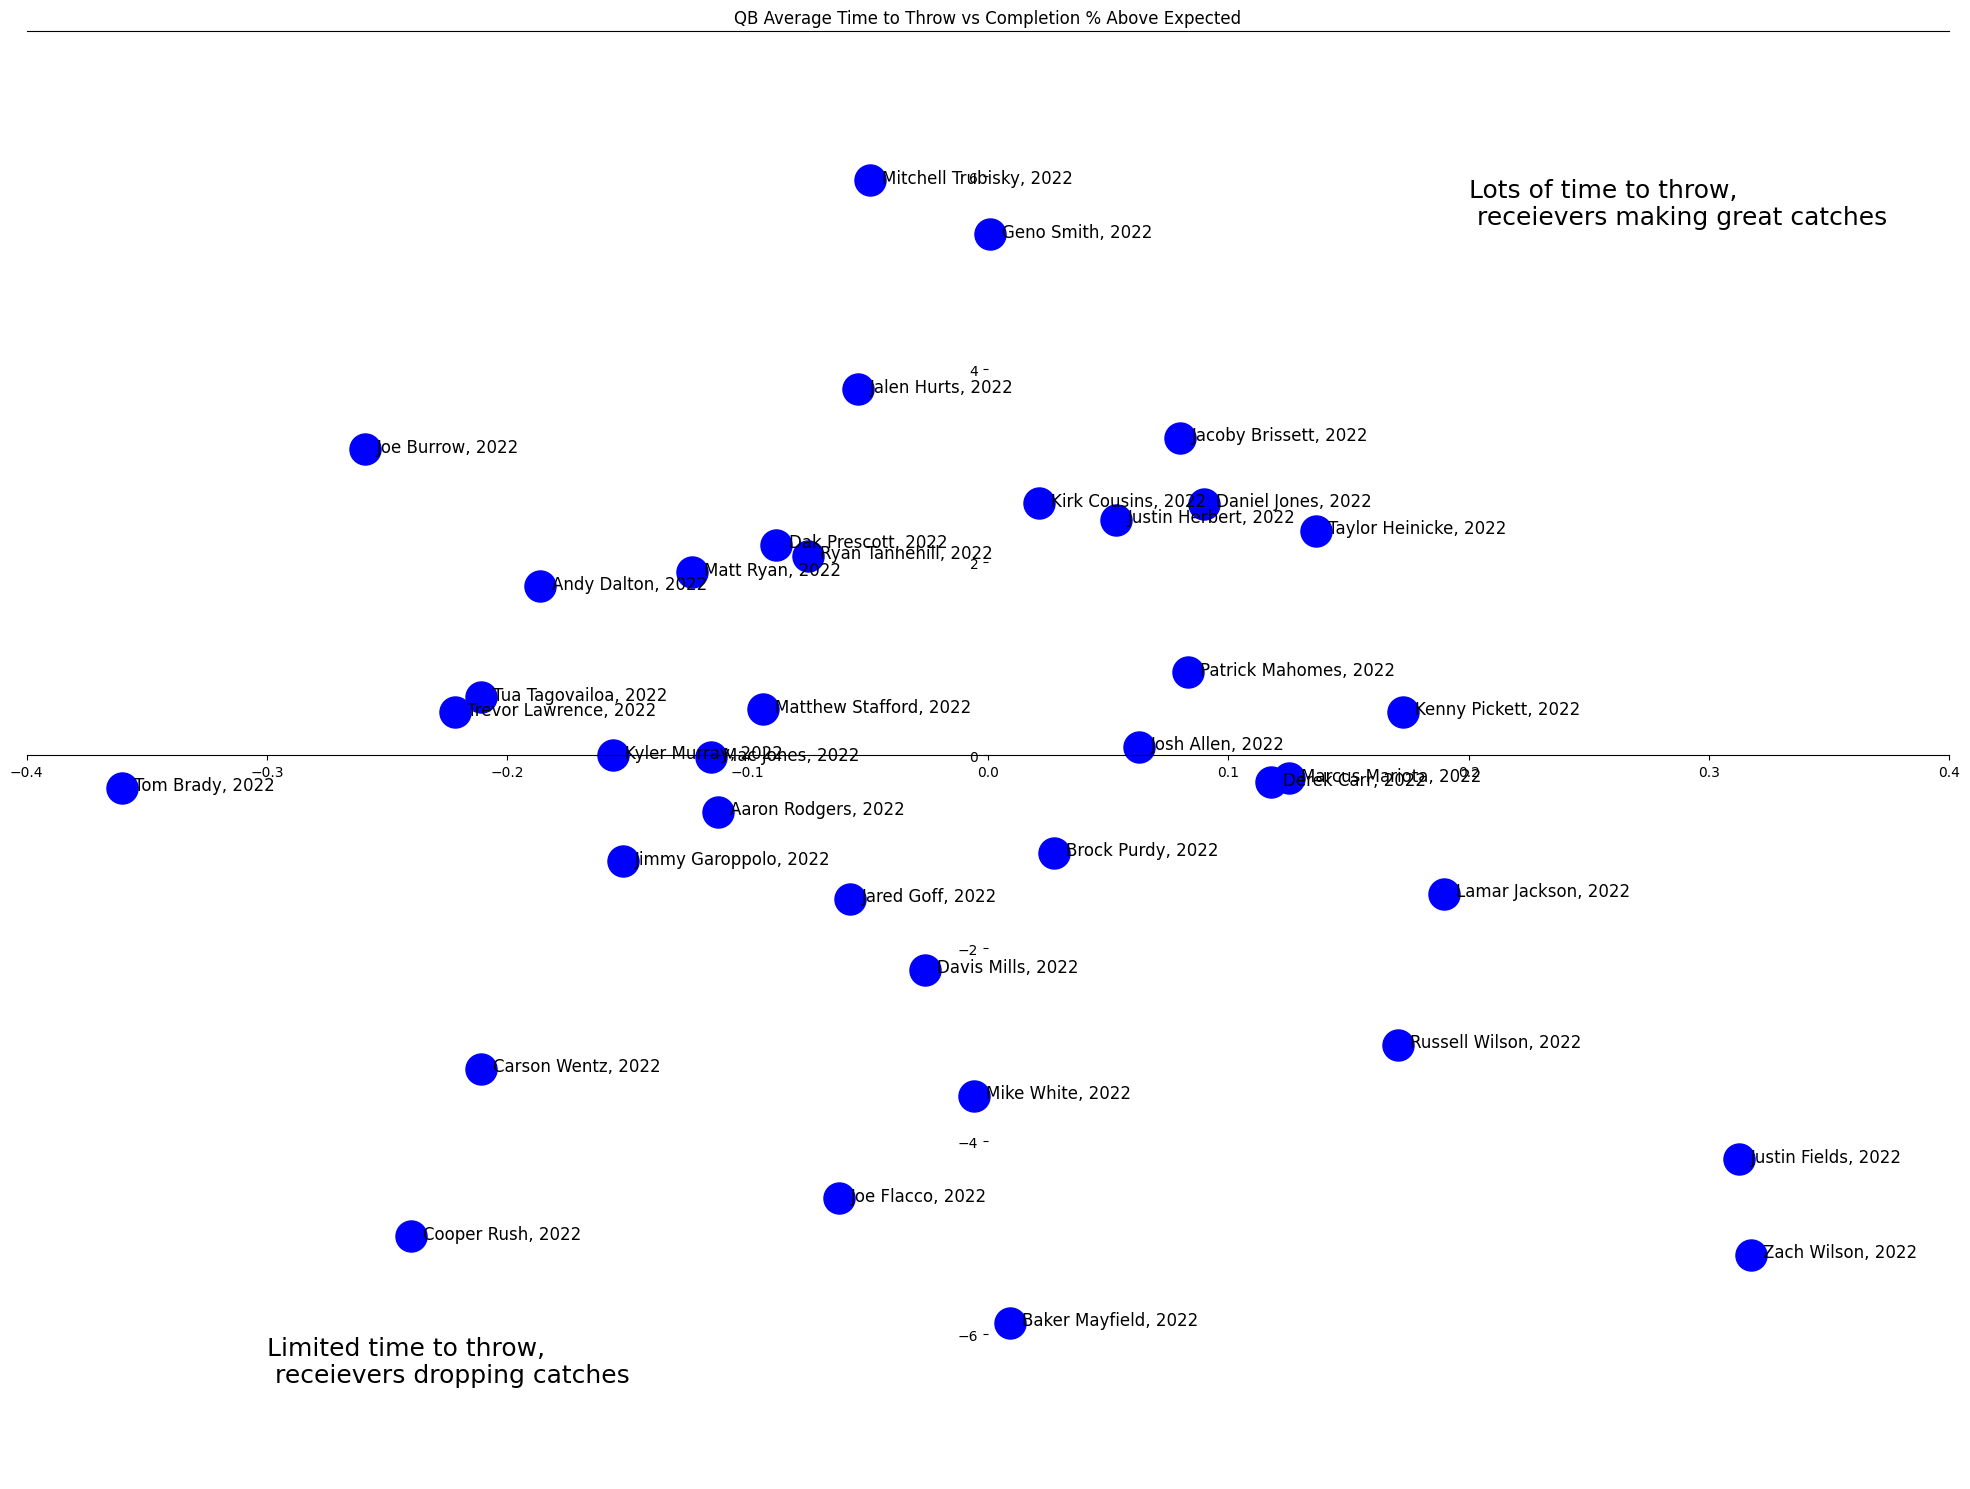

In [166]:
fig, ax = plt.subplots()

ax.scatter(xy_df['x'], xy_df['y'], s=500, c='blue')

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')

ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

plt.xlim((-0.4, 0.4))
plt.ylim(-7.5, 7.5)

for name in xy_df.index:
    plt.annotate(f"{df['player_display_name'][name]}, {df['season'][name]}", (xy_df['x'][name] + 0.005, xy_df['y'][name] - 0.025), fontsize = 12)

plt.annotate('Lots of time to throw, \n receievers making great catches', (0.2, 5.5), fontsize=18)
plt.annotate('Limited time to throw, \n receievers dropping catches', (-0.3, -6.5), fontsize=18)


plt.title(f'QB Average Time to Throw vs Completion % Above Expected')

plt.show()